**Notebook to model electricity price differences.**<br> 
Our Group member : 


*   Yue,Hou,8445186​
*   Xuxin,Tan,8445033​
*   Hsi-Wei,Wang,8443640
*   Yifan,Xing,8448316​
*   Zhongzhou.Yang,8443649​


## Data Preparation

Brief summary of the exercise:
* Target: predict the price change of electricity from the Close price of one hour to the Close price of the next hour
* Input: the elementwise difference between the hourly 'candels' of the electricity price; explanation follows.

  Hourly candels refers to the Open, High, Low, Close prices and the total Volume traded within an hour; thus each hourly candel has five elements. Historically, one could reconstruct these candels for each consecutive hour. We refer to the length of history for which the candels are reconstructed as 'window_size'. Thus, for a window_size of 5, one has candels from 5 consecutive hours.
  
  Left to explain is the 'elementwise difference' remark. Out of the N window_size of history, we compute differences between the consecutive candels: Open in t minus Open in t-1, Low in t minus low in t-1, etc. Thus, from N candels we create N-1 differentiated candels.

  In this exercise, the elementwise differentiated data for window_sizes of 5 and 15 are provided

  The data is further enchanced by mostly encoded time-related information. These encode what day of the week the data correspond to, whether the day is a bank holiday or not, etc. A list will be given further below.

* ML models are to be built to predict the Target from the Input data.

In [1]:
# Demonstration data used in this excercise is already preprocessed and split into
# training, validation, and test sets

# Use wget to download the data stored in csv format.
import itertools

# Define what files to download; download all of the preprocessed data
# Note that the data are already split into Train, Validation, and Test sets.
# The predictor data are denoted with 'X', the target by 'y'
data_download = {}
data_download["window_size"] = [5, 15]
data_download["data_type"] = ["train", "valid", "test"]
data_download["predictor_or_target"] = ["X", "y"]

# Prepare the combinations of the window sizes and the data types
keys, values = zip(*data_download.items())
data_download_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
display('The kind of data to be downloaded:', data_download_combinations)

print("Downloading started...")
for data_download_param in data_download_combinations:
  file_to_download = "https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_{0}_time_encoding_True/{1}_{2}_window_size_{0}_time_encoding_True.csv"\
                     .format(data_download_param["window_size"], data_download_param["predictor_or_target"], data_download_param["data_type"])

  # the actual downloading
  !wget "$file_to_download"

print("Downloading has finished")


'The kind of data to be downloaded:'

[{'data_type': 'train', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'train', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'valid', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'valid', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'test', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'test', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'train', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'train', 'predictor_or_target': 'y', 'window_size': 15},
 {'data_type': 'valid', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'valid', 'predictor_or_target': 'y', 'window_size': 15},
 {'data_type': 'test', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'test', 'predictor_or_target': 'y', 'window_size': 15}]

--2021-11-10 20:06:58--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/X_train_window_size_5_time_encoding_True.csv
Resolving frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)... 52.219.168.117
Connecting to frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)|52.219.168.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53997719 (51M) [text/csv]
Saving to: ‘X_train_window_size_5_time_encoding_True.csv.3’

X_train_window_size 100%[===================>]  51.50M  17.1MB/s    in 3.0s    

2021-11-10 20:07:02 (17.1 MB/s) - ‘X_train_window_size_5_time_encoding_True.csv.3’ saved [53997719/53997719]

--2021-11-10 20:07:02--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/y_train_window_size_5_time_encoding_True.csv
Resolving frankfu

In [2]:
# List the directory; the downloaded file should be there. Verify this.
!ls -lh

total 440M
drwxr-xr-x 1 root root 4.0K Nov  1 13:35 sample_data
-rw-r--r-- 1 root root 5.0M Sep  1 15:11 X_test_window_size_15_time_encoding_True.csv
-rw-r--r-- 1 root root 5.0M Sep  1 15:11 X_test_window_size_15_time_encoding_True.csv.1
-rw-r--r-- 1 root root 5.0M Sep  1 15:11 X_test_window_size_15_time_encoding_True.csv.2
-rw-r--r-- 1 root root 5.0M Sep  1 15:11 X_test_window_size_15_time_encoding_True.csv.3
-rw-r--r-- 1 root root 6.2M Sep  1 15:09 X_test_window_size_5_time_encoding_True.csv
-rw-r--r-- 1 root root 6.2M Sep  1 15:09 X_test_window_size_5_time_encoding_True.csv.1
-rw-r--r-- 1 root root 6.2M Sep  1 15:09 X_test_window_size_5_time_encoding_True.csv.2
-rw-r--r-- 1 root root 6.2M Sep  1 15:09 X_test_window_size_5_time_encoding_True.csv.3
-rw-r--r-- 1 root root  41M Sep  1 15:10 X_train_window_size_15_time_encoding_True.csv
-rw-r--r-- 1 root root  41M Sep  1 15:10 X_train_window_size_15_time_encoding_True.csv.1
-rw-r--r-- 1 root root  41M Sep  1 15:10 X_train_window_size_15_

### Load Data

In [3]:
import pandas as pd
data_frame_list ={}
for data_download_param in data_download_combinations:
  globals()["{0}_{1}_window_size_{2}".format(data_download_param["predictor_or_target"],data_download_param["data_type"],
                  data_download_param['window_size'])] = pd.read_csv('{0}_{1}_window_size_{2}_time_encoding_True.csv'.format(data_download_param["predictor_or_target"],
                  data_download_param["data_type"] ,
                  data_download_param['window_size']))


In [4]:
print('Predictor data:')
display(X_train_window_size_15.head(5))
print('Target data')
display(y_train_window_size_15[:5])

Predictor data:


,total_hours,dlvry_weekend,dlvry_bank_holiday,dlvry_day_sin,dlvry_day_cos,dlvry_weekday_sin,dlvry_weekday_cos,dlvry_hour_sin,dlvry_hour_cos,lasttrade_weekend,lasttrade_bank_holiday,lasttrade_day_sin,lasttrade_day_cos,lasttrade_weekday_sin,lasttrade_weekday_cos,lasttrade_hour_sin,lasttrade_hour_cos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,16.367966,0.0,0.0,0.394356,0.918958,0.0,1.0,2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,1.90,0.00,1.30,-1.80,-0.8,960.0,-0.60,-0.90,-0.71,-0.71,6.4,900.0,-1.20,-1.20,-0.04,0.41,-3.6,840.0,0.00,0.00,0.45,0.00,-10.2,...,-0.19,0.43,46.3,540.0,-0.27,0.17,0.44,-0.44,-13.1,480.0,0.05,0.00,-0.08,0.34,176.7,420.0,-0.56,-0.01,-1.87,-1.31,46.7,360.0,-0.42,-1.40,-2.61,-2.40,502.4,300.0,-2.89,-1.80,0.19,0.48,-202.3,240.0,0.47,0.65,0.40,-0.28,890.7,180.0
1,17.549852,0.0,0.0,0.394356,0.918958,0.0,1.0,1.224647e-16,-1.000000,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,-2.90,2.00,-2.90,-1.40,1.0,1020.0,3.50,0.00,0.50,-2.20,5.1,960.0,-3.80,-5.30,-1.10,0.20,-9.7,900.0,1.00,-0.30,0.96,-0.44,-8.2,...,-0.02,0.13,-1.4,600.0,0.20,0.05,0.35,-0.42,15.0,540.0,-0.16,0.11,-0.10,-0.10,340.6,480.0,-0.73,-0.50,-1.30,-1.30,-169.8,420.0,-1.20,-0.50,-3.45,-1.81,263.3,360.0,-1.81,-2.66,-0.50,-0.99,188.3,300.0,-1.00,0.66,0.66,-0.49,107.5,240.0
2,17.549852,0.0,0.0,0.394356,0.918958,0.0,1.0,1.224647e-16,-1.000000,0.0,0.0,0.394356,0.918958,0.0,1.0,0.707107,-0.707107,3.50,0.00,0.50,-2.20,5.1,960.0,-3.80,-5.30,-1.10,0.20,-9.7,900.0,1.00,-0.30,0.96,-0.44,-8.2,840.0,-0.12,0.24,-0.02,0.58,50.4,...,0.35,-0.42,15.0,540.0,-0.16,0.11,-0.10,-0.10,340.6,480.0,-0.73,-0.50,-1.30,-1.30,-169.8,420.0,-1.20,-0.50,-3.45,-1.81,263.3,360.0,-1.81,-2.66,-0.50,-0.99,188.3,300.0,-1.00,0.66,0.66,-0.49,107.5,240.0,-0.38,6.03,-2.01,-0.53,1169.5,180.0
3,19.078845,0.0,0.0,0.394356,0.918958,0.0,1.0,-2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.965926,-0.258819,2.59,5.69,2.59,5.69,10.7,1140.0,3.69,0.59,1.00,-2.10,8.7,1080.0,-0.30,-0.30,-1.30,-1.30,1.2,1020.0,-3.59,-3.19,0.00,0.50,65.9,...,-0.03,-0.03,-0.3,720.0,-0.01,-0.02,0.00,0.00,-4.4,660.0,0.03,0.03,-0.77,-0.77,62.7,600.0,-0.62,1.71,-0.52,1.80,141.3,540.0,1.08,-0.99,-0.13,-0.53,14.4,480.0,-0.94,-1.01,-2.84,-3.71,18.8,420.0,-2.51,-2.50,0.30,0.45,321.4,360.0
4,19.078845,0.0,0.0,0.394356,0.918958,0.0,1.0,-2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,3.69,0.59,1.00,-2.10,8.7,1080.0,-0.30,-0.30,-1.30,-1.30,1.2,1020.0,-3.59,-3.19,0.00,0.50,65.9,960.0,0.40,0.00,0.50,0.00,-90.5,...,0.00,0.00,-4.4,660.0,0.03,0.03,-0.77,-0.77,62.7,600.0,-0.62,1.71,-0.52,1.80,141.3,540.0,1.08,-0.99,-0.13,-0.53,14.4,480.0,-0.94,-1.01,-2.84,-3.71,18.8,420.0,-2.51,-2.50,0.30,0.45,321.4,360.0,-0.06,1.40,0.93,0.30,-79.6,300.0


Target data


,y
0,-4.20
1,-0.53
2,1.17
3,0.30
4,-1.32


**The content of the dataframe is the following:**<br>

Content of the dataframes:
* "y" - Target data
   * y: the Close price in t minus Close price in t-1 Target data
* "X" - Predictor data: various time-encoded data and the differentiated candels:
   * total_hours: hours from the first trade we know for a given contract until delivery start of the same contract
   * dlvry_weekend: whether the electricity is to be delivered on a weekend
   * dlvry_bank_holiday: whether the electricity is to be delivered on a bank holiday
   * dlvry_day_sin and dlvry_day_cos: the sinus-cosinus-encoded value of the day of the delivery day (identifies a day of the week in a circular fashion)
   * dlvry_hour_sin	and dlvry_hour_cos: the sinus-cosinus-encoded value of the delivery hour (idenitifies the hour of the delivery in a circular fashion)
   * lasttrade_...: similar to the delivery time encoding, but for the most recent trading hour used as a candel
   * the numbered columns: window_size - 1 number of differentiated candels with an additional time information: the number of minutes left until delivery start. Example for window_size of 5 follows. Column 0: Open in t-3 minus Open in t-4; Column 1: High in t-3 minus High in t-4; Column 2: similar for Low; Column 3: similar for Close; Column 4: similar for Volume; Column 5: minutes left until the delivery start in candel for t-3; Column 6: Open in t-2 minus Open in t-3; ...; Column 23: minutes left until the delivery start in candel for t

## Data Exploration

### Column/Row Distribution

the aim of column distribution is to get familiar with the dataset. Here we start from the predicted value :y 

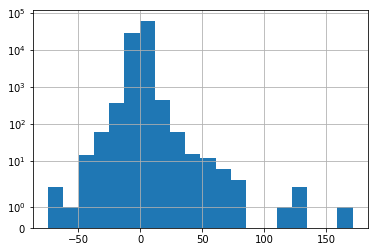

In [5]:
# Plot various aspect of the data to get familiar with it
import matplotlib.pyplot as plt
y_train_window_size_5["y"].hist(bins = 20)
plt.yscale("symlog")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


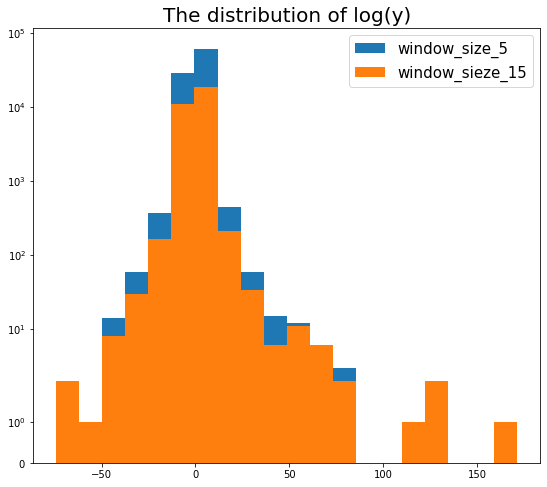

In [6]:
plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1,2,1)
ax1.hist(y_train_window_size_5["y"],bins = 20,label = 'window_size_5')
ax1.set_yscale("symlog")
ax2 = plt.subplot(1,2,1)
ax2.hist(y_train_window_size_15["y"],bins = 20,label='window_size_15')
ax2.set_yscale("symlog")
plt.legend(['window_size_5','window_sieze_15'],fontsize =15)
plt.title('The distribution of log(y)',fontsize = 20)
plt.show()

The distribution of log(y) is roughly the same in window_size 5 and window_size 15. The shape of the 'density line' looks like normal distribution but is non-symmetric.

### Trend

The aim of trend analysis is to capture the dynamic moving patterns of data, thus we try from different aspects.

#### stationary analysis

Stationary process (a.k.a. a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time."


In [7]:
!pip install statsmodels==0.12.1

In [8]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y_test_window_size_5.values.reshape(y_test_window_size_5.shape[0]))

print('p-value: %f' % result[1])

print("Should be under 0.05")

p-value: 0.000000
Should be under 0.05


By passing a Dickey-Fuller test, very low p-value here indicates that the process is a **staionary** process, which means y is not decreasing nor increasing.

#### Periodicity
Periodicity describes the quality, state, or fact of being regularly recurrent or having periods.

Since some time indicators has already been transformed to sin-cos form, to get more direct understanding of the period, we will combine the sin and cos columns into one column, with this formula: *y = arctan(cos(x)/sin(x))* 

In [9]:
import seaborn as sns
import numpy as np
def concat_column(df,columns):
  for (i,j) in columns:
    df[i[:-4]] = np.arctan(df[j]/df[i])
  return df,[ i[0][:-4] for i in columns]   

In [10]:
columns = ['dlvry_weekend', 'dlvry_bank_holiday', 'lasttrade_weekend',
       'lasttrade_bank_holiday']

concat_columns = [('dlvry_day_sin',
       'dlvry_day_cos'), ('dlvry_weekday_sin', 'dlvry_weekday_cos'),
       ('dlvry_hour_sin', 'dlvry_hour_cos'),('lasttrade_day_sin', 'lasttrade_day_cos'),
       ('lasttrade_weekday_sin', 'lasttrade_weekday_cos'), ('lasttrade_hour_sin',
       'lasttrade_hour_cos')]

In [11]:
reindexed_df,coordinate_col = concat_column(X_train_window_size_5,concat_columns)

In [12]:
reindexed_df = pd.concat([reindexed_df,y_train_window_size_5],axis =1)

In [13]:
import seaborn as sns
def sns_plt(df,columns):

  plt.close() #It is sometimes good to make sure the canvas prior is rendered and plot is closed.
  fig,axes = plt.subplots(1,len(columns),figsize = (12*len(columns),10))
  for i in range(len(columns)):
    AX = sns.boxplot(df[columns[i]],df['y'], ax=axes[i]) #width=20)
    AX.set_yscale("symlog")
    plt.title("Values for {}".format(columns[i]))
#plt.xlabel("day")
  return plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

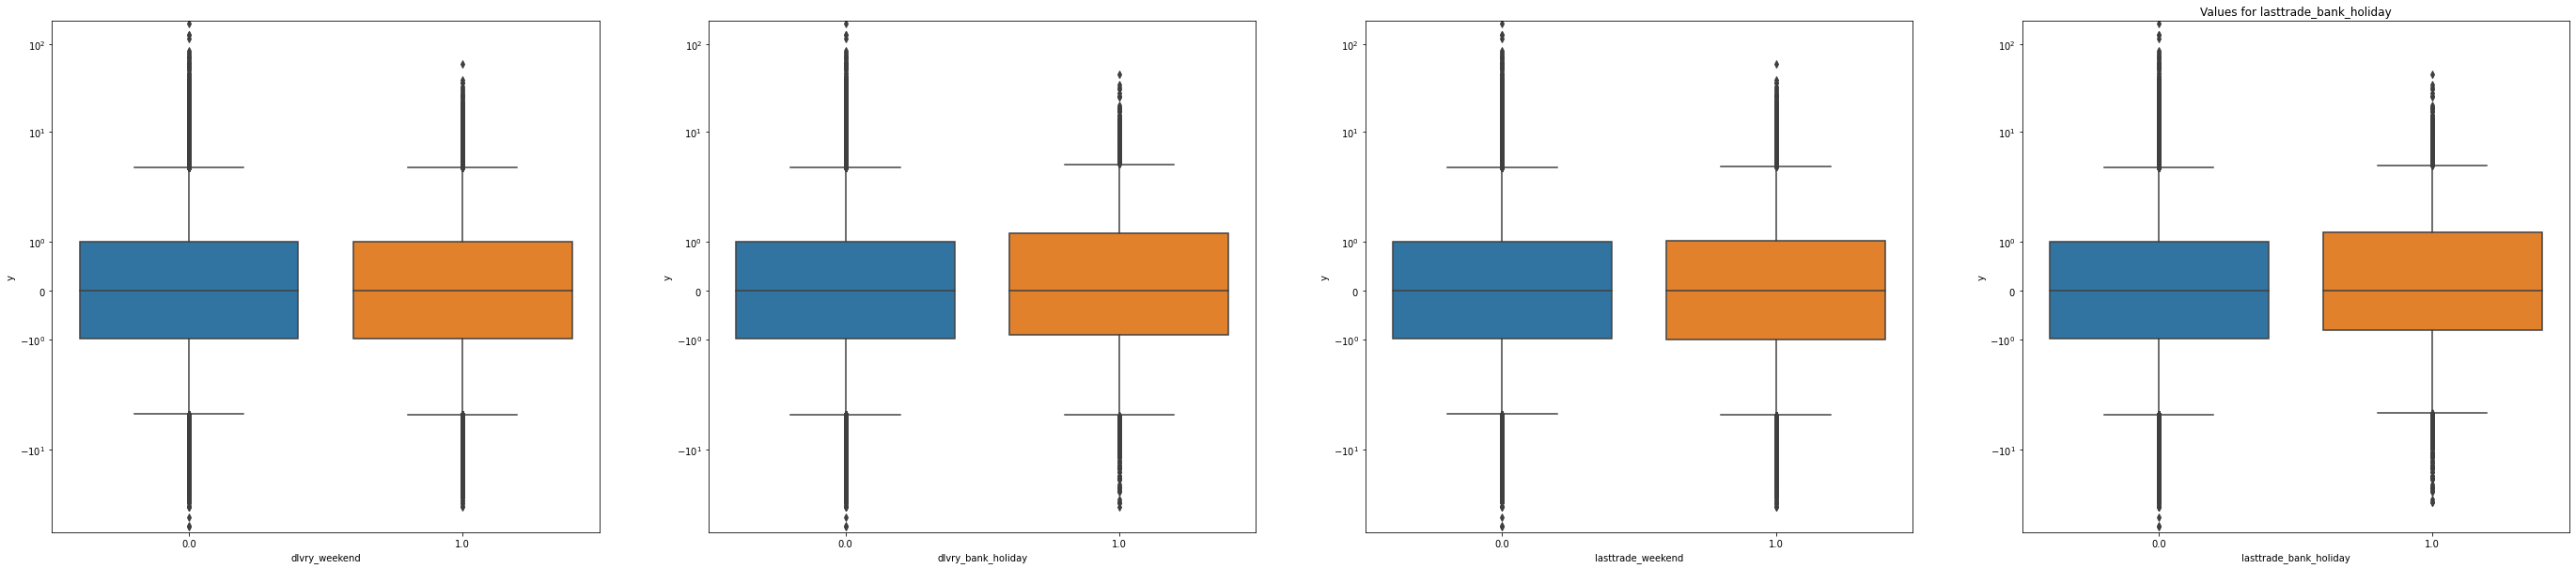

In [14]:
sns_plt(reindexed_df,columns)

These four columns: dlvry_weekend, dlvry_bank_holiday, lastrade_weekend, lasttrade_bank_holiday, all could be observed an obvious recurrent pattern. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

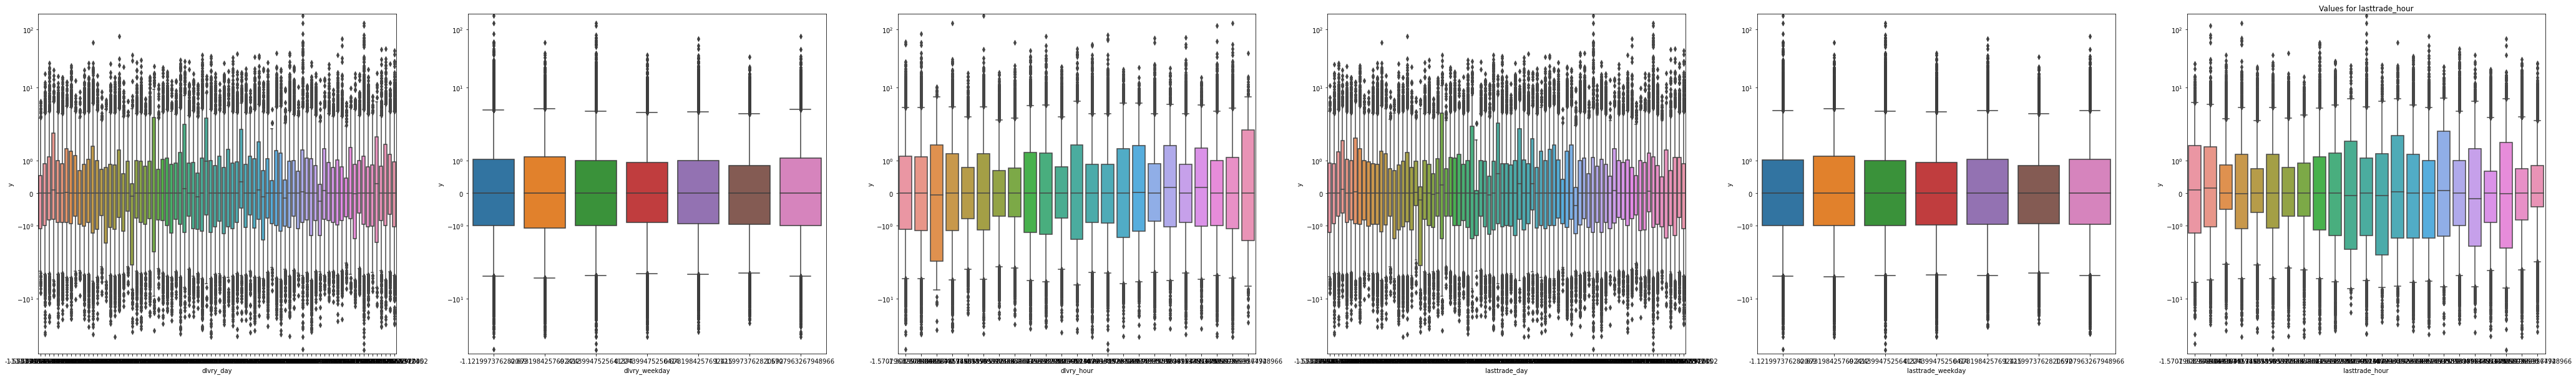

In [15]:
sns_plt(reindexed_df,coordinate_col)

So do the columns dlvery_date, dlvery_hour, dlvery_weekday, lastrade_date, lasttrade_hour, lastrade_weekday

#### Decompose

By decompositon, we will further detect how the trend and seasonal compartments can be combined together. 

In [16]:
# this is a function to calculate number of circles.
def period_recgonize(series):
  dic = {}
  for i in range(len(series)):
    if series.iloc[i] not in dic.keys():
      dic[series.iloc[i]] =1
    else :
      if series.iloc[i] != series.iloc[i-1]:
        dic[series.iloc[i]] += 1

  return dic

In [17]:
def get_period(column):
  column = period_recgonize(column)
  column = pd.DataFrame.from_dict(column, orient='index')
  return print('frequency:{0},length:{1}'.format(len(column),column.max()))

In [18]:
get_period(reindexed_df['dlvry_day'])

frequency:82,length:0    14
dtype: int64


In [19]:
# this is a function to normalize series
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
def normalize(series):
  normalizer = MinMaxScaler((0.000001,0.999999))
  series = series.values.reshape(-1,1).astype(float)
  series = normalizer.fit_transform(series)
  return series

<Figure size 1440x2160 with 0 Axes>

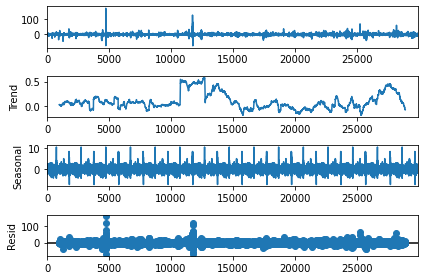

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.close()
#from statsmodels.tsa.seasonal 
plt.figure(figsize=(20, 30))
analysis = seasonal_decompose(y_train_window_size_15,model="additive", period=83*24) #multiplicative, additive

analysis.plot()
plt.show()

With a period of 83(since there are 83 unique value of dlvry_dya) *24(24 unique dlvry_hour value), the seasonal patter here is obvious

#### Acf and Pacf
Acf(autocorrelation function) observes correlations "naively" with some amount of time-points, PACF (partial autocorrelation function) tries to control for the fact, that the effect of points in time travel through the series, so if there is a very influential effect in an early point in time, it's effect would be influencing all next time points, making them look also influential. In PACF this is controlled for.

<Figure size 432x288 with 0 Axes>

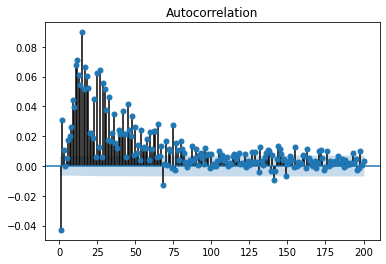

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
plt.figure()
plot_acf(y_train_window_size_5,lags = 200, zero=False)  
plt.show()

We can see that the past influence could trace back to 75 timesteps or even further.

<Figure size 432x288 with 0 Axes>

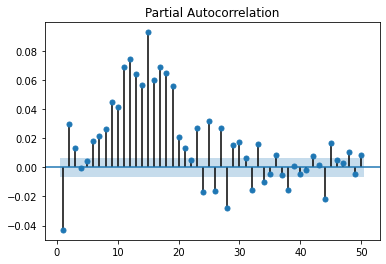

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plot_pacf(y_train_window_size_5, lags=50, zero=False)
plt.show()

In terms of Pacf, 20 is selected as a start for future timeseries models

## Evaluation 
Here are several functions of evaluation model. We print Mean Square Value(MSE) and Mean Absolute Value(MAE) to see how a model behave, and R2_socore is also presented to see how well the model fit data.

For the evaluation of non time series model, we calculated the predicted y and true y from given data.

For time series model, we calculated the predicted y and given y, the difference here is for some timestep there are no predicted y , so it is replaced with 0.











In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from math import sqrt

def evaluate_model(model, X_test, y_test_true):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test_true,predictions)
    print("Mean squared error on test:",mse)
    mae = mean_absolute_error(y_test_true,predictions)
    print("Mean absolute error on test:",mae)
    r2 = r2_score(y_test_true,predictions)
    print("R2_score on test:",r2)
    return mse,mae,r2

In [26]:
def evaluate_time_model(model,y_true):
  predictions = model.predict()
  predictions = predictions.fillna(0)
  mse = mean_squared_error(y_true,predictions)
  print("Mean squared error on test:",mse)
  mae = mean_absolute_error(y_true,predictions)
  print("Mean absolute error on test:",mae)
  r2 = r2_score(y_true,predictions)
  print("R2_score on test:",r2)
  return mse,mae,r2

In [27]:
def evaluate_time_transfer_model(y_predict,y_true):
  mse = mean_squared_error(y_true,y_predict)
  print("Mean squared error on test:",mse)
  mae = mean_absolute_error(y_true,y_predict)
  print("Mean absolute error on test:",mae)
  r2 = r2_score(y_true,y_predict)
  print("R2_score on test:",r2)
  return mse,mae,r2

## Base line
We start from baseline model, one is DummyRegressor, the other is AutoRegression model.

### Non sequential Baseline

In [28]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy="mean")

dummy_model.fit(X_train_window_size_15, y_train_window_size_15)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [29]:
result = evaluate_model(dummy_model,X_test_window_size_15, y_test_window_size_15)

Mean squared error on test: 41.92988765321216
Mean absolute error on test: 3.01123314148565
R2_score on test: -2.088165703684197e-06


### Time Series Baseline

In [30]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
mod = AutoReg(y_test_window_size_5, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                10704
Model:                     AutoReg(3)   Log Likelihood              -31512.551
Method:               Conditional MLE   S.D. of innovations              4.599
Date:                Wed, 10 Nov 2021   AIC                              3.053
Time:                        20:09:15   BIC                              3.056
Sample:                             3   HQIC                             3.054
                                10704                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0682      0.044      1.534      0.125      -0.019       0.155
y.L1          -0.0122      0.010     -1.260      0.208      -0.031       0.007
y.L2          -0.0071      0.010     -0.731      0.4

In [31]:
result = evaluate_time_model(res,y_test_window_size_5)

Mean squared error on test: 21.15352480181836
Mean absolute error on test: 2.2611520444589353
R2_score on test: 0.00021481249312793604


The AutoRegression model behave better, since it captures the trend of y while not simply 'Guessing'. But the model has space to be improved.

## Time Series Model optimizition

In [32]:
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [33]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

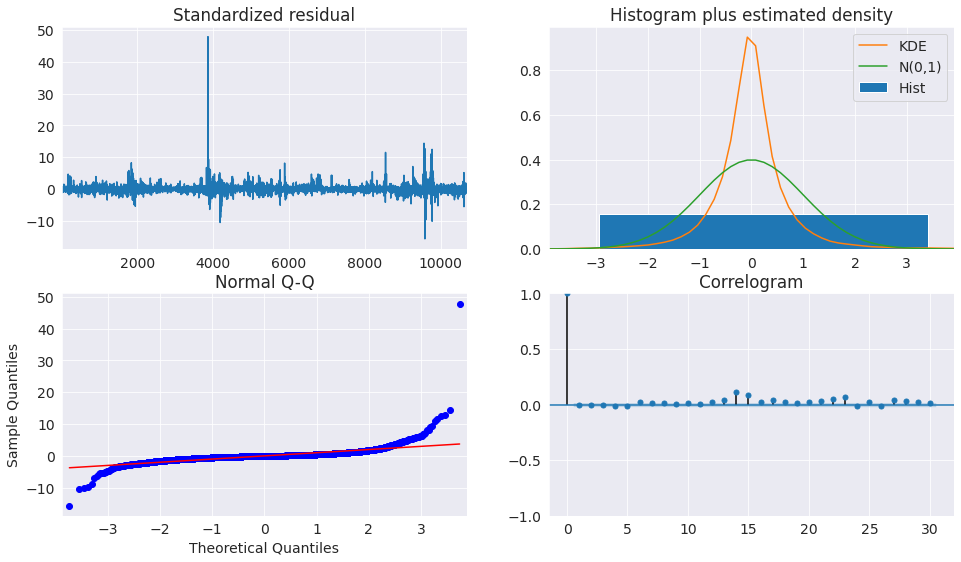

In [34]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

A diagnose plot shows some defects of our first AutoRegression model. The distribution of our dataset is not linear. Since we have observed the past influence could trace back to 20 timesteps, we first try with a lag of 20 in AutoRegression model. 

In [35]:
mod = AutoReg(y_test_window_size_5, 20, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                10704
Model:                    AutoReg(20)   Log Likelihood              -31303.570
Method:               Conditional MLE   S.D. of innovations              4.531
Date:                Wed, 10 Nov 2021   AIC                              3.026
Time:                        20:14:21   BIC                              3.041
Sample:                            20   HQIC                             3.031
                                10704                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0422      0.044      0.962      0.336      -0.044       0.128
y.L1          -0.0364      0.010     -3.761      0.000      -0.055      -0.017
y.L2          -0.0255      0.010     -2.632      0.0

In [36]:
result = evaluate_time_model(res,y_test_window_size_5)

Mean squared error on test: 20.50588752958228
Mean absolute error on test: 2.2853256126394683
R2_score on test: 0.030824281020251476


We see a better result here, the MSE decrease, and R2_score increase. A worthwile trying. 

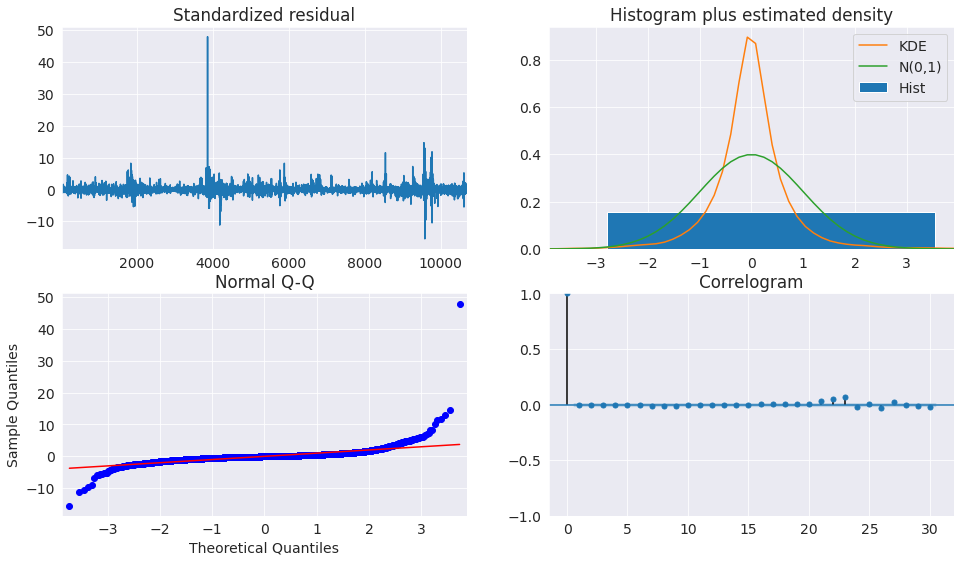

In [37]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

But from the diagnose plot, the distribution problem is not improved. 
In traditional time series analysis, there are two types of variable matrix. 
The frist is endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.). 

Modelling only with endogenous variable(in our case,y ) will lose some information. So we find another model that contains exogenous variables.

In [38]:
from statsmodels.tsa.api import SARIMAX
sarimax_mod = SARIMAX(y_test_window_size_5,exog=X_test_window_size_5.values,order = (20,0,0), trend="c")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10704
Model:              SARIMAX(20, 0, 0)   Log Likelihood              -31181.773
Date:                Wed, 10 Nov 2021   AIC                          62489.546
Time:                        20:24:11   BIC                          62948.083
Sample:                             0   HQIC                         62644.234
                              - 10704                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0030   4.12e-05     72.790      0.000       0.003       0.003
x1            -0.0001      0.020     -0.006      0.995      -0.039       0.038
x2             0.2661      0.412      0.645      0.5

In [39]:
result = evaluate_time_model(sarimax_res,y_test_window_size_5)

Mean squared error on test: 19.851698428893325
Mean absolute error on test: 2.3096964243829365
R2_score on test: 0.061743410518756536


What is improved here is the R2_score and a lower MSE. But not all the coefficients are statistical significant given their high p-value. 

We want to know only, with these more relevant variable,the result will be as good but faster. So we first observe the correlation of these variables. 


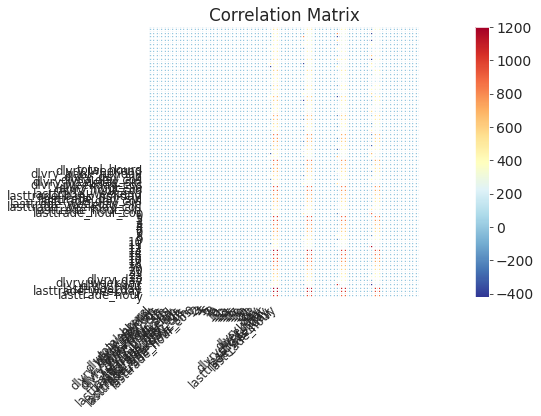

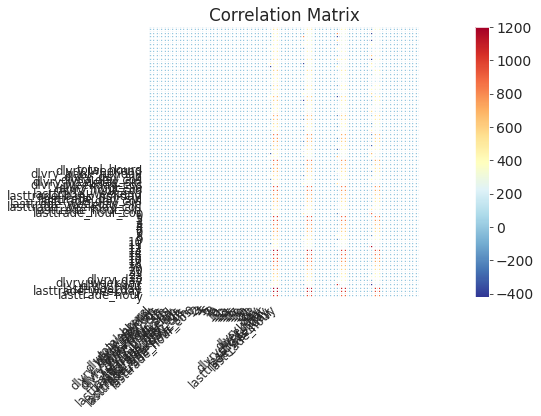

In [61]:
import statsmodels.graphics.api as smg
smg.plot_corr(reindexed_df.iloc[1:100], xnames=reindexed_df.columns)

Then put the most relevant 4 columns into the model

In [55]:
from statsmodels.tsa.api import SARIMAX
sarimax_mod = SARIMAX(y_test_window_size_5,exog=X_test_window_size_5.iloc[:,[20,26,32,38]].values,order = (20,0,0), trend="c")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10704
Model:              SARIMAX(20, 0, 0)   Log Likelihood              -31287.916
Date:                Wed, 10 Nov 2021   AIC                          62627.832
Time:                        20:54:21   BIC                          62817.069
Sample:                             0   HQIC                         62691.671
                              - 10704                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0405      0.056      0.727      0.467      -0.069       0.150
x1            -0.0224      0.008     -2.842      0.004      -0.038      -0.007
x2            -0.0746      0.010     -7.655      0.0

In [57]:
result = evaluate_time_model(sarimax_res,y_test_window_size_5)

Mean squared error on test: 20.249299862673816
Mean absolute error on test: 2.2856222761082066
R2_score on test: 0.04295145845641957


The result is not better. So we try to put more Exogenous variables into the model by using the window_size_15 dataset.

In [59]:
from statsmodels.tsa.api import SARIMAX
sarimax_mod = SARIMAX(y_test_window_size_15,exog=X_test_window_size_15.values,order = (20,0,0), trend="c")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3496
Model:              SARIMAX(20, 0, 0)   Log Likelihood              -11223.756
Date:                Wed, 10 Nov 2021   AIC                          22693.513
Time:                        21:16:08   BIC                          23451.116
Sample:                             0   HQIC                         22963.908
                               - 3496                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0262    9.8e-06  -2672.140      0.000      -0.026      -0.026
x1             0.2233      0.243      0.917      0.359      -0.254       0.700
x2             0.2760      0.454      0.608      0.5

In [60]:
result = evaluate_time_model(sarimax_res,y_test_window_size_15)

Mean squared error on test: 35.98640651862729
Mean absolute error on test: 3.115425987662178
R2_score on test: 0.14174628938099876


So far we get a better R2_socre, but with a increasing MSE

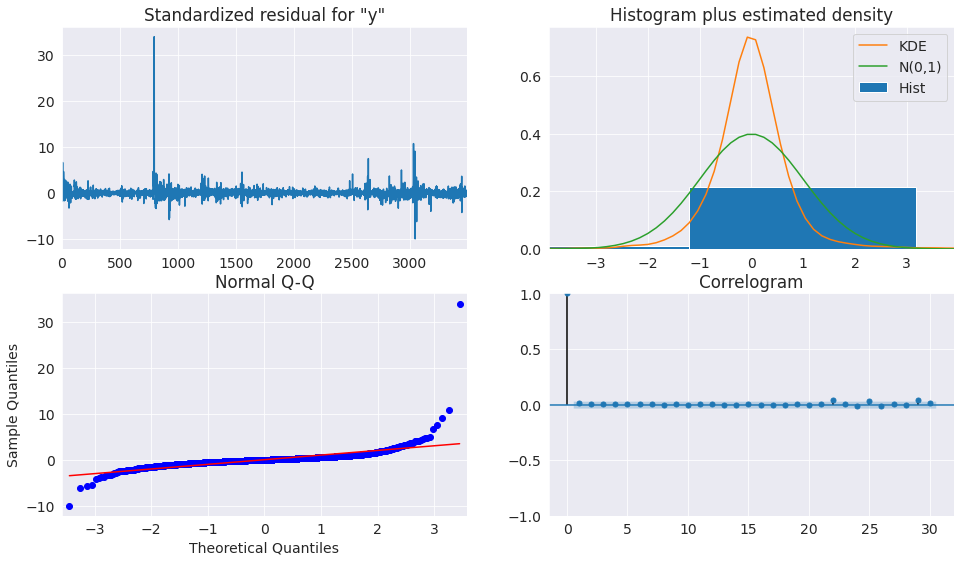

In [62]:
fig = plt.figure(figsize=(16, 9))
fig = sarimax_res.plot_diagnostics(fig=fig, lags=30)

But the distribution problem is still not even improved a little. We probably need to find other ways to transform the distribution of dataset. And other models are also worthtrying.